# How well do jobs and skills pay for Data Engineers?

#### Methodology
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Engineers
3. Visualize for highest paying skills and most demanded skills


## Import Libraries and Data

In [2]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Salary Distrubition by Job Title

Filter the data to only include salary values from Germany.

In [3]:
df_GR = df[(df['job_country'] == 'Germany')].dropna(subset=['salary_year_avg'])

Create a list of the main job_titles in our dataset and filter our dataframe to only contain these job titles.

In [4]:
job_titles = df_GR['job_title_short'].value_counts().index[:6].to_list()

df_GR_top6 = df_GR[df_GR['job_title_short'].isin(job_titles)]

job_order = df_GR_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_titles

['Data Analyst',
 'Data Scientist',
 'Data Engineer',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Senior Data Scientist']

## Plot Salary Distrubitions

Plot the top 6 job titles salary distrubitions using a box plot.

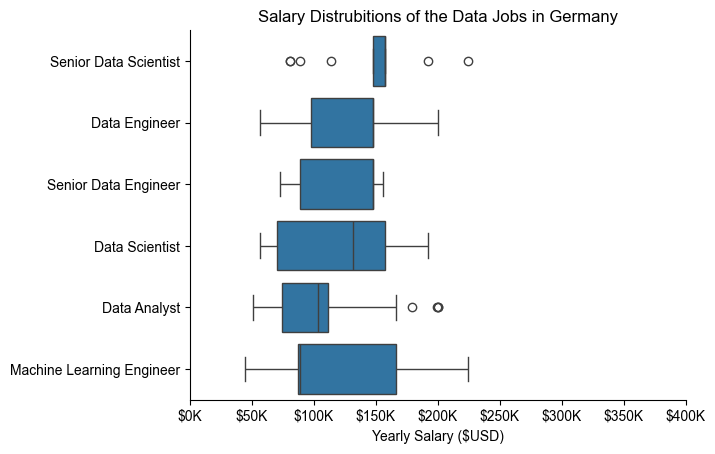

In [5]:
sns.boxplot(data=df_GR_top6,x='salary_year_avg',y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Salary Distrubitions of the Data Jobs in Germany')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0, 400000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

## Investigate Median Salary vs Skill for Data Engineers

Filters the original dataset to only get rows where the job title is 'Data Engineer' and the country is 'Germany', to create a new DataFrame `df_DE_GR`. Drop NaN values from the `salary_year_avg` column. Then it uses the `explode` method on the `job_skills` column to create a new row in the DataFrame for each skill associated with a job. Finally, it displays the first five entries of the `salary_year_avg` and `job_skills` columns.

In [6]:
df_DE_GR = df[(df['job_title_short'] == 'Data Engineer') & (df['job_country'] == 'Germany')].copy()

df_DE_GR = df_DE_GR.dropna(subset=['salary_year_avg'])

df_DE_GR = df_DE_GR.explode('job_skills')

df_DE_GR[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
7772,199675.0,spark
45652,147500.0,sql
45652,147500.0,scala
45652,147500.0,spark
100515,89100.0,assembly


## Determine the Highest Paid Skills and Most Demanded Skills

Gets the top ten highest paying skills for Data Engineers by calculating the median salary for each skill listed in the `df_DE_GR`. It groups the data by job skills, computes the median salary, sorts these values in descending order by median, and then selects the top ten. This is then formatted into a new DataFrame (`df_DE_top_pay`) with a reset index and a renamed salary column labeled `median_salary`.

In [7]:
df_DE_top_pay = df_DE_GR.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DE_top_pay = df_DE_top_pay.head(10)

df_DE_top_pay

,count,median
job_skills,,
github,2,200000.0
matlab,1,200000.0
go,1,163500.0
bigquery,2,147500.0
terraform,5,147500.0
tableau,1,147500.0
databricks,3,147500.0
dynamodb,1,147500.0
jira,1,147500.0


Calculates the count and median salary for each skill in `df_DE_GR`. It groups the data by `job_skills`, aggregates it to find the count and median salary for each skill, and then sorts the results by count in descending order by count. It re-sorts this subject by median salary in descending order. 

In [8]:
df_DE_skills = df_DE_GR.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DE_skills = df_DE_skills.head(10).sort_values(by='median', ascending=False)

df_DE_skills

,count,median
job_skills,,
spark,19,147500.0
sql,19,147500.0
terraform,5,147500.0
aws,10,143750.0
python,20,128587.5
airflow,8,122891.5
gcp,6,122891.5
git,6,122472.0
azure,8,98301.5


Creates two horizantal bar charts:
1. Displays the highest paid skills
2. Shows the most in demand skills

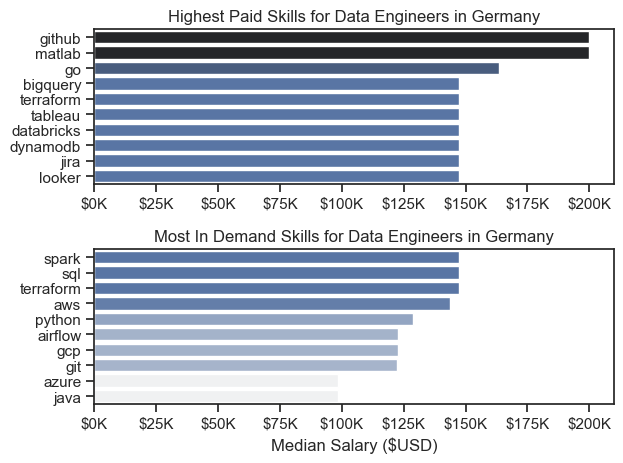

In [11]:
fig, ax = plt.subplots(2,1)

sns.barplot(data=df_DE_top_pay, x='median', y=df_DE_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Highest Paid Skills for Data Engineers in Germany')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.barplot(data=df_DE_skills, x='median', y=df_DE_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
ax[1].set_title('Most In Demand Skills for Data Engineers in Germany')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()